# *신경망 학습*

## 3. 수치 미분
> - 손실함수로 최적의 매개변수를 찾는 경우, 기울기(미분값)를 기준으로 나아갈 방향을 설정

___

### 1) 미분
- 미분이란 어느 한 순간의 변화량을 계산하는 것으로 수식으로 표현할 시 아래와 같음
$$
\frac{df(x)}{dx} = lim_{h\to0}\frac{f(x+h) - f(x)}{h}
$$

- $x$의 작은 변화량 $h$가 함수 $f(x)$를 얼마나 변화시키는 지 계산
- 위 식의 간단한 예시는 아래 함수와 같음

In [1]:
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h)-f(x)) / h

- 다만 위같은 함수에서 발생할 수 있는 오류가 2가지 있음

    1. 파이썬에서 지나치게 작은 값은 반올림 오차로 계산 결과의 오차를 유발

In [3]:
np.float32(1e-50)

0.0

    2. 위 함수의 계산은 $x+h$와 $x$ 사이의 변화에 관한 계산이며, 접선에서의 기울기를 구하는 진정한 미분은 아님
      - x를 중심으로 전후의 차분을 계산한다는 의미에서 중심차분, 혹은 중앙차분이나 전방차분이라고 명명
![](image/fig 4-5.png)

- 개선점을 반영하면 다음과 같이 함수를 재구현 가능

In [5]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

- 위와 같이 아주 작은 차분으로 미분하는 것을 **수치 미분**이라고 함
- 일반적으로 수식을 전개개 미분하는 것을 **해석적 미분** 이라고 함 ($\frac{dy}{dx}$)
___

### 2) 수치 미분의 예
- 앞 절의 수치미분을 사용한 간단한 함수 미분

In [8]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [9]:
import numpy as np
import matplotlib.pylab as plt

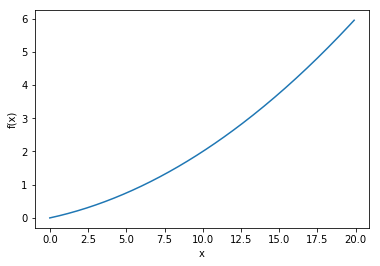

In [11]:
x = np.arange(0, 20, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [12]:
numerical_diff(function_1, 5)

0.1999999999990898

In [13]:
numerical_diff(function_1, 10)

0.2999999999986347

- 위의 계산값 은 $x$가 5와 10일 때의 **수치 미분 해**임
- function_1($f(x) = 0.01x^2 + 0.1x$)의 **해석적 해**는 $\frac{df(x)}{dx} = 0.02x + 0.1$임
- 따라서 $x$가 5와 10일 때의 **해석적 해**는 0.2와 0.3으로 거의 같은 값이라고 해도 될 만큼의 작은 오차를 보임
- 각각의 수치 미분 값을 기울기로 하는 직선을 그리면 아래와 같음

0.1999999999990898
0.2999999999986347


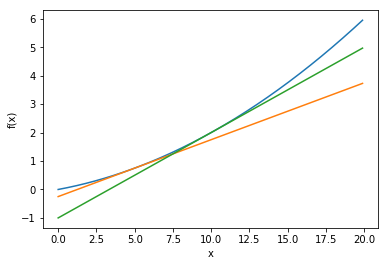

In [15]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

tf = tangent_line(function_1, 10)
y3 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

___
### 3) 편미분

- 변수가 2개인 경우 다른 방식으로 구현
$$f(x_0,\ x_1) = x_0^2 + x_1^2$$

In [20]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # return np.sum(x**2)

- 위 함수를 그래프로 그리면 아래와 같이 표현 가능
![](image/fig 4-8.png)

- 주의할 점은 **'어느 변수에 대한 미분'**인지 구별 해야 함
- 변수가 여럿인 함수에 대한 미분을 **편미분** 이라고 함
$$\frac{\delta f}{\delta x_0}\ 또는 \ \frac{\delta f}{\delta x_1}$$
- 이 경우 하나의 값을 고정하여 변수가 하나인 함수로 정의하고, 해당 함수를 미분

- $x_0 = 3, x_1 = 4$일 때, $x_0$에 대한 편미분 $\frac{\delta f}{\delta x_0}$

In [22]:
def function_tmp1(x0):
    return x0**2 + 4 ** 2

numerical_diff(function_tmp1, 3)

6.00000000000378

In [24]:
def function_tmp2(x1):
    return 3**2 + x1**2

numerical_diff(function_tmp2, 4)

7.999999999999119

- 위 수치 편미분 값은 해석적 해인 6, 8과 거의 차이가 없음